In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/AB_NYC_2019.csv')

# Step 1: Clean the dataset (manual way)
nyc_data = df.copy()

nyc_data_cleaned = nyc_data.dropna(subset=['price', 'latitude', 'longitude'])
nyc_data_filtered = nyc_data_cleaned[(nyc_data_cleaned['price'] >= 10) & (nyc_data_cleaned['price'] <= 500)]
nyc_data_filtered['reviews_per_month'] = nyc_data_filtered['reviews_per_month'].fillna(0)


df_clean = nyc_data_filtered.copy()

# Step 2: Select features and target
features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
            'reviews_per_month', 'calculated_host_listings_count', 'availability_365',
            'room_type', 'neighbourhood_group']
target = 'price'

# Manual one-hot encoding for categorical features
df_features = df_clean[features]
df_target = df_clean[target].values.reshape(-1, 1)

df_features = pd.get_dummies(df_features, columns=['room_type', 'neighbourhood_group'], drop_first=True)

# Normalize numeric features manually
X_raw = df_features.values.astype(float)
X_mean = X_raw.mean(axis=0)
X_std = X_raw.std(axis=0)
X_scaled = (X_raw - X_mean) / X_std

# Target
y = df_target.astype(float)

# Add bias term
X_with_bias = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Split into train/test manually (80/20)
n = X_with_bias.shape[0]
split_index = int(n * 0.8)
X_train, X_test = X_with_bias[:split_index], X_with_bias[split_index:]
y_train, y_test = y[:split_index], y[split_index:]



C:\Users\haomiao_xu\AppData\Local\Temp\ipykernel_3644\353384597.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_data_filtered['reviews_per_month'] = nyc_data_filtered['reviews_per_month'].fillna(0)


C:\Users\haomiao_xu\AppData\Local\Temp\ipykernel_3644\708816266.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=nyc_data_filtered, x='neighbourhood_group', palette="viridis")


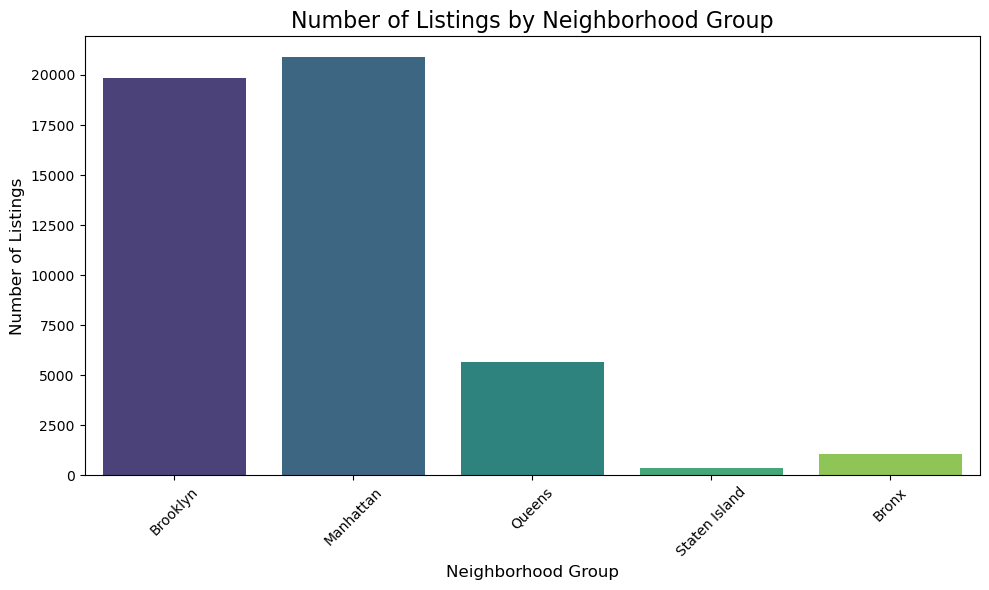

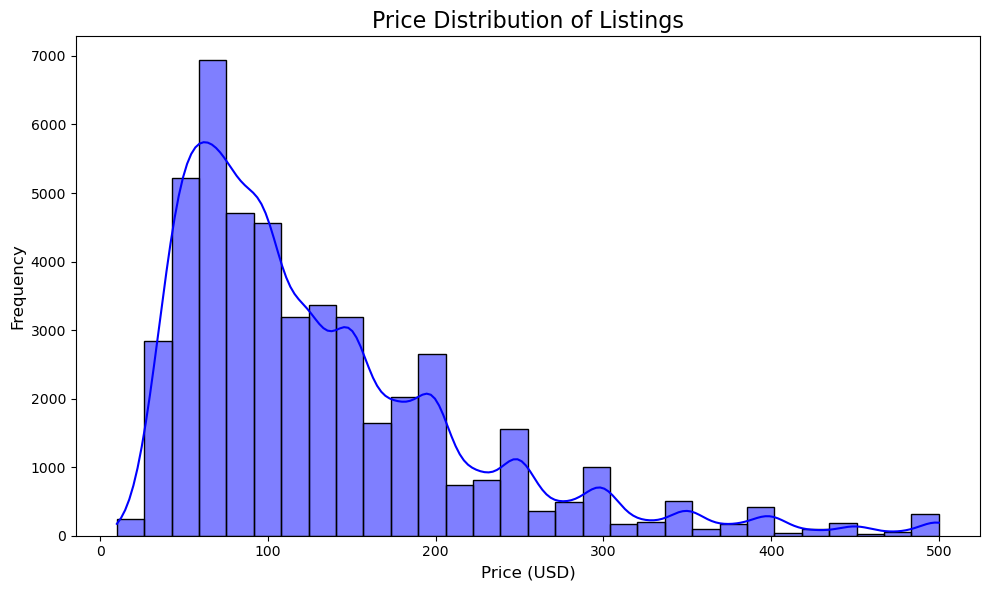

In [22]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=nyc_data_filtered, x='neighbourhood_group', palette="viridis")
plt.title('Number of Listings by Neighborhood Group', fontsize=16)
plt.xlabel('Neighborhood Group', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(nyc_data_filtered['price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution of Listings', fontsize=16)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


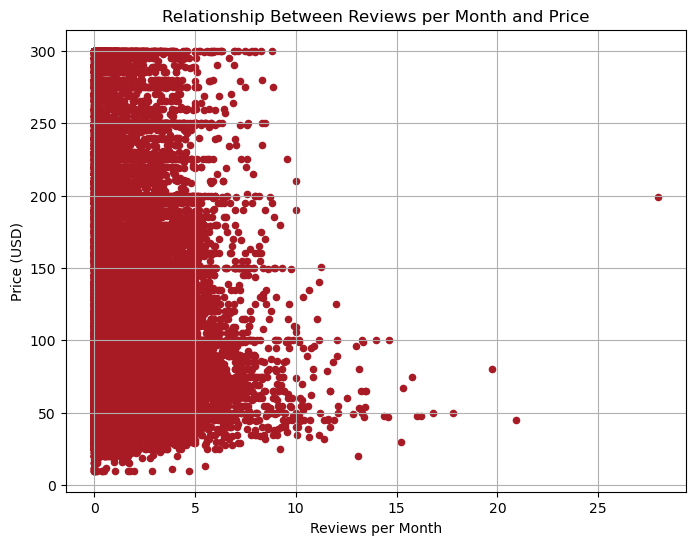

Correlation between Reviews per Month and Price (Outliers Removed):
                    reviews_per_month     price
reviews_per_month           1.000000 -0.050715
price                      -0.050715  1.000000


C:\Users\haomiao_xu\AppData\Local\Temp\ipykernel_3644\3209736397.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['price_category'] = pd.cut(
C:\Users\haomiao_xu\AppData\Local\Temp\ipykernel_3644\3209736397.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = filtered_data.groupby('price_category')['reviews_per_month'].mean()


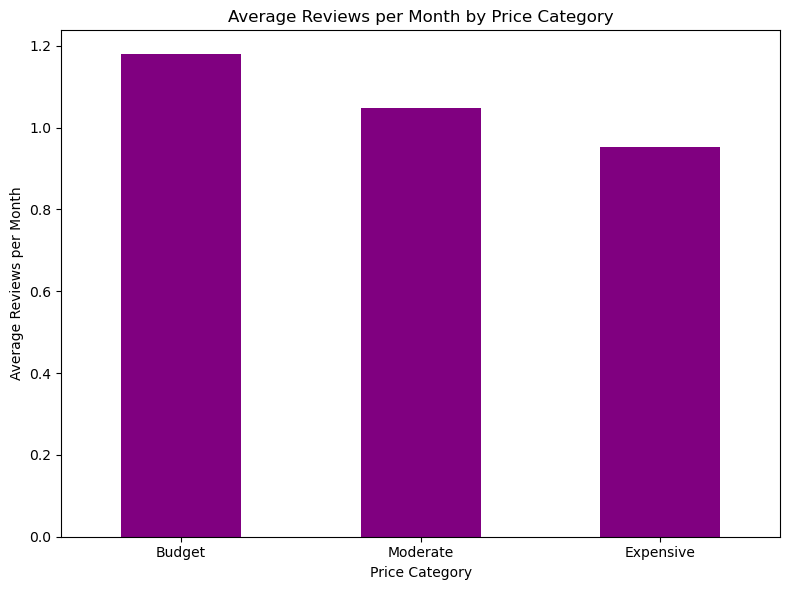

In [23]:
filtered_data = nyc_data_filtered[
    (nyc_data_filtered['price'] <= 300) & (nyc_data_filtered['reviews_per_month'] <= 30)
]

# Scatter plot after removing outliers
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['reviews_per_month'], filtered_data['price'], alpha=1, color=(0.6588, 0.1059, 0.1451), s=20)
plt.title('Relationship Between Reviews per Month and Price')
plt.xlabel('Reviews per Month')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

# Recalculate correlation after outlier removal
filtered_correlation = filtered_data[['reviews_per_month', 'price']].corr()
print("Correlation between Reviews per Month and Price (Outliers Removed):\n", filtered_correlation)

# Grouping analysis by price category
filtered_data['price_category'] = pd.cut(
    filtered_data['price'],
    bins=[0, 100, 200, 300],
    labels=['Budget', 'Moderate', 'Expensive']
)
grouped_data = filtered_data.groupby('price_category')['reviews_per_month'].mean()

# Bar plot for grouped analysis
grouped_data.plot(kind='bar', color='purple', figsize=(8, 6))
plt.title('Average Reviews per Month by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average Reviews per Month')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
def gradient_descent_linear(X, y, lr=0.01, max_iter=1000, tol=1e-6):
    w = np.zeros((X.shape[1], 1))
    for _ in range(max_iter):
        grad = -2 * X.T @ (y - X @ w) / len(y)
        w_new = w - lr * grad
        if np.linalg.norm(w_new - w) < tol:
            break
        w = w_new
    return w

def evaluate(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    r2 = 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - y_true.mean())**2)
    return mse, rmse, r2

w_ols_gd = gradient_descent_linear(X_train, y_train, lr=0.01, max_iter=10000)

y_pred_ols_gd = X_test @ w_ols_gd

ols_gd_eval = evaluate(y_test, y_pred_ols_gd)

ols_gd_eval

(5820.376951681076, 76.29139500416201, 0.42115295390024543)

In [25]:
import random

class FastDecisionTree:
    def __init__(self, max_depth=3, min_samples_split=10, max_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.tree = None

    def _mse(self, y):
        return np.var(y) * len(y) if len(y) > 0 else 0

    def _best_split(self, X, y):
        best_feature, best_thresh, best_mse = None, None, float('inf')
        n_samples, n_features = X.shape
        features = list(range(n_features))
        if self.max_features:
            features = random.sample(features, self.max_features)

        for j in features:
            thresholds = np.linspace(X[:, j].min(), X[:, j].max(), num=10)
            for t in thresholds:
                left_mask = X[:, j] <= t
                right_mask = ~left_mask
                if left_mask.sum() < self.min_samples_split or right_mask.sum() < self.min_samples_split:
                    continue
                mse = self._mse(y[left_mask]) + self._mse(y[right_mask])
                if mse < best_mse:
                    best_mse = mse
                    best_feature = j
                    best_thresh = t
        return best_feature, best_thresh

    def _build(self, X, y, depth=0):
        if depth >= self.max_depth or len(y) < self.min_samples_split or np.all(y == y[0]):
            return np.mean(y)
        feat, thresh = self._best_split(X, y)
        if feat is None:
            return np.mean(y)
        left_mask = X[:, feat] <= thresh
        right_mask = ~left_mask
        return {
            'feature': feat,
            'threshold': thresh,
            'left': self._build(X[left_mask], y[left_mask], depth + 1),
            'right': self._build(X[right_mask], y[right_mask], depth + 1)
        }

    def fit(self, X, y):
        self.tree = self._build(X, y.flatten())

    def _predict_row(self, x, node):
        if not isinstance(node, dict):
            return node
        if x[node['feature']] <= node['threshold']:
            return self._predict_row(x, node['left'])
        else:
            return self._predict_row(x, node['right'])

    def predict(self, X):
        return np.array([self._predict_row(x, self.tree) for x in X]).reshape(-1, 1)

class StrongRandomForest:
    def __init__(self, n_estimators=50, max_depth=3, max_features=None, min_samples_split=10):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.trees = []
        for _ in range(self.n_estimators):
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample, y_sample = X[indices], y[indices]
            tree = FastDecisionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                max_features=self.max_features
            )
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        preds = [tree.predict(X) for tree in self.trees]
        return np.mean(preds, axis=0)

strong_forest = StrongRandomForest(n_estimators=50, max_depth=3, max_features=10, min_samples_split=20)
strong_forest.fit(X_train, y_train)
y_pred_strong_forest = strong_forest.predict(X_test)
strong_forest_eval = evaluate(y_test, y_pred_strong_forest)

strong_forest_eval


(6162.6400656203805, 78.50248445508193, 0.38711426634832513)